---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
import pandas as pd
import numpy as np

file = r'Energy Indicators.xls'
energy = pd.read_excel(file, header=None, skiprows=18, skipfooter=38, usecols="C:F", na_values="...")
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy['Energy Supply'] *= 1000000
energy['Country'] = energy['Country'].str.replace(r'[0-9]', '')
energy['Country'] = energy['Country'].str.replace(r' \(.+\)', '')

energy.replace({"Republic of Korea": "South Korea", 
                "United States of America": "United States",
                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                "China, Hong Kong Special Administrative Region": "Hong Kong"},
               inplace=True)
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
5,Angola,6.420000e+08,27.0,70.909090
6,Anguilla,2.000000e+06,136.0,0.000000
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000
8,Argentina,3.378000e+09,79.0,24.064520
9,Armenia,1.430000e+08,48.0,28.236060


In [2]:
energy.iloc[235-18-1]

Country                     United States
Energy Supply                  9.0838e+10
Energy Supply per Capita              286
% Renewable                        11.571
Name: 216, dtype: object

In [3]:
energy.iloc[117-18-1]

Country                          Iran
Energy Supply               9.172e+09
Energy Supply per Capita          119
% Renewable                   5.70772
Name: 98, dtype: object

In [4]:
energy.iloc[62-18-1]

Country                     Hong Kong
Energy Supply                5.85e+08
Energy Supply per Capita           82
% Renewable                         0
Name: 43, dtype: object

In [5]:
file2 = r'world_bank.csv'
GDP = pd.read_csv(file2, skiprows=4)
GDP.replace({"Korea, Rep.": "South Korea", 
            "Iran, Islamic Rep.": "Iran",
            "Hong Kong SAR, China": "Hong Kong"},
           inplace=True)
# GDP.set_index('Country Name').loc['Hong Kong']
GDP

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN
1,Andorra,AND,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
2,Afghanistan,AFG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
3,Angola,AGO,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
4,Albania,ALB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
5,Arab World,ARB,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
6,United Arab Emirates,ARE,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.789489e+11,2.878318e+11,2.970189e+11,2.814464e+11,2.860493e+11,3.009462e+11,3.216922e+11,3.355937e+11,3.509313e+11,3.621003e+11
7,Argentina,ARG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,1.206739e+11,1.272239e+11,1.261399e+11,1.194442e+11,1.315442e+11,1.454477e+11,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN
8,Armenia,ARM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.679746e+09,9.873142e+09,1.055439e+10,9.060944e+09,9.260285e+09,9.695518e+09,1.039360e+10,1.073658e+10,1.111236e+10,1.144574e+10
9,American Samoa,ASM,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
file3 = r'scimagojr-3.xlsx'
ScimEn = pd.read_excel(file3)
ScimEn

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [7]:
energy.set_index('Country', inplace=True)
GDP.set_index('Country Name', inplace=True)
ScimEn.set_index('Country', inplace=True)
merge_energy_gdp = energy.merge(GDP, how='inner', left_index=True, right_index=True)

In [8]:
merge_all = ScimEn.merge(merge_energy_gdp, how='inner', left_index=True, right_index=True)

In [9]:
merge_all

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [10]:
merge_energy_gdp = energy.merge(GDP, how='inner', left_index=True, right_index=True)
merge_all = ScimEn.merge(merge_energy_gdp, how='inner', left_index=True, right_index=True)
merge_all.shape

(162, 69)

In [11]:
merge_energy_gdp_outer = energy.merge(GDP, how='outer', left_index=True, right_index=True)
merge_all_outer = ScimEn.merge(merge_energy_gdp, how='outer', left_index=True, right_index=True)
merge_all_outer.shape

(215, 69)

In [12]:
merge_all_outer.shape[0]-merge_all.shape[0]

53

In [13]:
(merge_all.drop([str(x) for x in range(1960, 2006)], axis=1)
    .drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)
#     .where(merge_all['Rank']<=15)
#     .dropna()
 .shape
)

(162, 20)

In [14]:
(merge_all.drop([str(x) for x in range(1960, 2006)], axis=1)
    .drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)
    .shape
)

(162, 20)

In [15]:
import pandas as pd
import numpy as np

def answer_one():
    file = r'Energy Indicators.xls'
    energy = pd.read_excel(file, header=None, skiprows=18, skipfooter=38, parse_cols="C:F", na_values="...")
    energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
    energy['Energy Supply'] *= 1000000
    energy['Country'] = energy['Country'].str.replace(r'[0-9]', '')
    energy['Country'] = energy['Country'].str.replace(r' \(.+\)', '')

    energy.replace({"Republic of Korea": "South Korea", 
                    "United States of America": "United States",
                    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                    "China, Hong Kong Special Administrative Region": "Hong Kong"},
                   inplace=True)
    
    file2 = r'world_bank.csv'
    GDP = pd.read_csv(file2, skiprows=4)
    GDP.replace({"Korea, Rep.": "South Korea", 
                "Iran, Islamic Rep.": "Iran",
                "Hong Kong SAR, China": "Hong Kong"},
                inplace=True)
    
    file3 = r'scimagojr-3.xlsx'
    ScimEn = pd.read_excel(file3)
    
    energy.set_index('Country', inplace=True)
    GDP.set_index('Country Name', inplace=True)
    ScimEn.set_index('Country', inplace=True)
    
    merge_energy_gdp = energy.merge(GDP, how='inner', left_index=True, right_index=True)
    merge_all = ScimEn.merge(merge_energy_gdp, how='inner', left_index=True, right_index=True)
    
    result = (merge_all.drop([str(x) for x in range(1960, 2006)], axis=1)
        .drop(['Country Code', 'Indicator Name','Indicator Code'], axis=1)
        .loc[merge_all['Rank']<=15])
#     print(result.shape)
    return result

answer_one()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [16]:
# def answer_one():
#     return "ANSWER"

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [17]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [18]:
def answer_two():
    return "ANSWER"

In [76]:
energy.reset_index(inplace=True)

In [82]:
# pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)

In [85]:
file = r'Energy Indicators.xls'
energy = pd.read_excel(file, header=None, skiprows=18, skipfooter=38, parse_cols="C:F", na_values="...")
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy['Energy Supply'] *= 1000000
energy['Country'] = energy['Country'].str.replace(r'[0-9]', '')
energy['Country'] = energy['Country'].str.replace(r' \(.+\)', '')

energy.replace({"Republic of Korea": "South Korea", 
                "United States of America": "United States",
                "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
                "China, Hong Kong Special Administrative Region": "Hong Kong"},
               inplace=True)

file2 = r'world_bank.csv'
GDP = pd.read_csv(file2, skiprows=4)
GDP.replace({"Korea, Rep.": "South Korea", 
            "Iran, Islamic Rep.": "Iran",
            "Hong Kong SAR, China": "Hong Kong"},
            inplace=True)

file3 = r'scimagojr-3.xlsx'
ScimEn = pd.read_excel(file3)

energy.set_index('Country', inplace=True)
GDP.set_index('Country Name', inplace=True)
ScimEn.set_index('Country', inplace=True)

merge_energy_gdp = energy.merge(GDP, how='outer', left_index=True, right_index=True)
merge_all = ScimEn.merge(merge_energy_gdp, how='outer', left_index=True, right_index=True)
merge_all

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Afghanistan,163.0,3.0,3.0,0.0,0.0,0.00,0.0,3.210000e+08,10.0,78.669280,...,1.030523e+10,1.172119e+10,1.214448e+10,1.469733e+10,1.593680e+10,1.691113e+10,1.935220e+10,1.973134e+10,1.999032e+10,2.029415e+10
Albania,118.0,23.0,23.0,168.0,14.0,7.30,6.0,1.020000e+08,35.0,100.000000,...,9.771760e+09,1.034829e+10,1.112752e+10,1.150029e+10,1.192695e+10,1.223109e+10,1.240477e+10,1.254247e+10,1.279331e+10,1.312082e+10
Algeria,42.0,1215.0,1197.0,7393.0,1413.0,6.08,40.0,1.959000e+09,51.0,0.551010,...,1.446474e+11,1.495654e+11,1.531550e+11,1.556055e+11,1.612073e+11,1.658823e+11,1.715223e+11,1.763249e+11,1.830252e+11,1.901632e+11
American Samoa,180.0,1.0,1.0,0.0,0.0,0.00,0.0,NaN,NaN,0.641026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,168.0,2.0,2.0,13.0,0.0,6.50,1.0,9.000000e+06,121.0,88.695650,...,4.018196e+09,4.021331e+09,3.675728e+09,3.535389e+09,3.346317e+09,3.185605e+09,3.129538e+09,3.127550e+09,NaN,NaN
Angola,99.0,50.0,50.0,79.0,0.0,1.58,5.0,6.420000e+08,27.0,70.909090,...,5.581103e+10,6.842044e+10,7.787420e+10,7.975320e+10,8.247091e+10,8.570262e+10,9.012096e+10,9.626143e+10,1.008863e+11,1.039106e+11
Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+06,136.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,169.0,2.0,2.0,0.0,0.0,0.00,0.0,8.000000e+06,84.0,0.000000,...,1.268714e+09,1.389229e+09,1.390217e+09,1.222890e+09,1.135539e+09,1.115174e+09,1.159999e+09,1.155982e+09,1.211723e+09,1.256122e+09
Arab World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.763824e+12,1.863481e+12,1.980983e+12,2.011001e+12,2.103825e+12,2.173896e+12,2.318267e+12,2.385580e+12,2.436659e+12,2.509068e+12
Argentina,40.0,1223.0,1213.0,10620.0,1654.0,8.68,47.0,3.378000e+09,79.0,24.064520,...,3.788140e+11,4.089887e+11,4.215649e+11,4.217758e+11,4.616402e+11,5.003555e+11,5.043671e+11,5.189199e+11,5.212737e+11,NaN


## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [19]:
df = answer_one()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


In [20]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [21]:
avgGDP = df.apply(lambda x:np.mean(x[[str(x) for x in range(2006, 2016)]]), axis=1)
avgGDP.sort_values(ascending=False, inplace=True)
avgGDP

United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

In [22]:
def answer_three():
    Top15 = answer_one()
    avgGDP = Top15.apply(lambda x:np.mean(x[[str(x) for x in range(2006, 2016)]]), axis=1)
    avgGDP.sort_values(ascending=False, inplace=True)
    return avgGDP

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [23]:
def answer_four():
    Top15 = answer_one()
    answer = Top15.loc['United Kingdom']['2015'] - Top15.loc['United Kingdom']['2006']
    return answer

answer_four()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [24]:
df['Energy Supply per Capita'].mean()

157.6

In [25]:
def answer_five():
    Top15 = answer_one()
    answer = Top15['Energy Supply per Capita'].mean()
    return answer

answer_five()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


157.6

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [26]:
type(df['% Renewable'].idxmax())

str

In [27]:
df['% Renewable'].loc[df['% Renewable'].idxmax()]

69.64803

In [28]:
def answer_six():
    Top15 = answer_one()
    country = Top15['% Renewable'].idxmax()
    percentage = Top15['% Renewable'].loc[country]
    return (country, percentage)

answer_six()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [29]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


In [30]:
df['Ratio'] = df['Self-citations'] / df['Citations']
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Ratio
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035


In [31]:
country = df['Ratio'].idxmax()
country

'China'

In [32]:
country

'China'

In [33]:
def answer_seven():
    Top15 = answer_one()
    Top15['Ratio'] = Top15['Self-citations'] / Top15['Citations']
    country = Top15['Ratio'].idxmax()
    ratio = Top15['Ratio'].loc[country]
    return (country, ratio)

answer_seven()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [34]:
df['population'] = df['Energy Supply'] / df['Energy Supply per Capita']

In [35]:
df['population'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['population'].sort_values(ascending=False).index[2]

'United States'

In [36]:
def answer_eight():
    Top15 = answer_one()
    Top15['population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    country = Top15['population'].sort_values(ascending=False).index[2]
    return country

answer_eight()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [37]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,Ratio,population
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035,4.980543e+07


In [38]:
df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
df['Citable docs per Capita'] = df['Citable documents'] / df['PopEst']

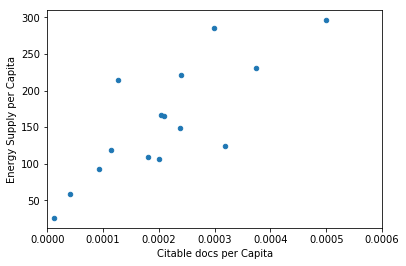

In [39]:
import matplotlib as plt
%matplotlib inline

df.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [40]:
df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])

0.7940010435442946

In [41]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    result = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
    return result

answer_nine()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


0.7940010435442946

In [42]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [43]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [44]:
test = df['% Renewable'].sort_values(ascending=True)

In [45]:
test2 = (test >= test.median()).astype(int)
test2

South Korea           0
Iran                  0
Japan                 0
United Kingdom        0
United States         0
Australia             0
India                 0
France                1
Russian Federation    1
Germany               1
China                 1
Italy                 1
Spain                 1
Canada                1
Brazil                1
Name: % Renewable, dtype: int64

In [46]:
def answer_ten():
    Top15 = answer_one()
    # What exactly is ascending order of rank??
    HighRenew = Top15['% Renewable'].sort_values(ascending=True)
    HighRenew = (HighRenew >= HighRenew.median()).astype(int)
    return HighRenew



### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [47]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2010,2011,2012,2013,2014,2015,Ratio,population,PopEst,Citable docs per Capita
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,1.367645e+09,0.000093
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,3.176154e+08,0.000298
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,1.274094e+08,0.000238
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,6.387097e+07,0.000319
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,1.435000e+08,0.000128
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,3.523986e+07,0.000500
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,8.036970e+07,0.000209
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,1.276731e+09,0.000012
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,6.383735e+07,0.000203
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035,4.980543e+07,4.980543e+07,0.000239


In [48]:
df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']

In [49]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
df['Continent'] = pd.Series(ContinentDict)
# next(iter(df.set_index('Continent').groupby(level=0)))[1]
# next(iter(df.groupby('Continent')))[1]
group = df.set_index('Continent').groupby(level=0)
size = group.apply(lambda x: x.shape[0])
sum_ = group.apply(lambda x: x['PopEst'].sum())
mean_ = group.apply(lambda x: x['PopEst'].mean())
std_ = group.apply(lambda x: x['PopEst'].std())
df3 = pd.concat([size, sum_, mean_, std_], axis=1)
df3.columns = ['size', 'sum', 'mean', 'std']
df3

,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


In [50]:
def answer_eleven():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}    
    Top15['Continent'] = pd.Series(ContinentDict)
    # next(iter(df.set_index('Continent').groupby(level=0)))[1]
    # next(iter(df.groupby('Continent')))[1]
    group = Top15.set_index('Continent').groupby(level=0)
    size = group.apply(lambda x: x.shape[0])
    sum_ = group.apply(lambda x: x['PopEst'].sum())
    mean_ = group.apply(lambda x: x['PopEst'].mean())
    std_ = group.apply(lambda x: x['PopEst'].std())
    stats = pd.concat([size, sum_, mean_, std_], axis=1)
    stats.columns = ['size', 'sum', 'mean', 'std']
    return stats

answer_eleven()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


,size,sum,mean,std
Continent,,,,
Asia,5,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1,2.331602e+07,2.331602e+07,NaN
Europe,6,4.579297e+08,7.632161e+07,3.464767e+07
North America,2,3.528552e+08,1.764276e+08,1.996696e+08
South America,1,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [51]:
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2011,2012,2013,2014,2015,Ratio,population,PopEst,Citable docs per Capita,Continent
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,0.689313,1.367645e+09,1.367645e+09,0.000093,Asia
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,0.335031,3.176154e+08,3.176154e+08,0.000298,North America
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,0.275997,1.274094e+08,1.274094e+08,0.000238,Asia
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,0.183773,6.387097e+07,6.387097e+07,0.000319,Europe
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,0.362517,1.435000e+08,1.435000e+08,0.000128,Europe
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,0.190369,3.523986e+07,3.523986e+07,0.000500,North America
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,0.195111,8.036970e+07,8.036970e+07,0.000209,Europe
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,0.288973,1.276731e+09,1.276731e+09,0.000012,Asia
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,0.218943,6.383735e+07,6.383735e+07,0.000203,Europe
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,0.197035,4.980543e+07,4.980543e+07,0.000239,Asia


In [52]:
df.groupby(['Continent', pd.cut(df['% Renewable'], 5)]).apply(lambda x: x.shape[0])

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [60]:
df['cut'] = pd.cut(df['% Renewable'], 5)

In [70]:
df.groupby(['Continent', 'cut'])['% Renewable'].agg(np.count_nonzero)

Continent      cut             
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: % Renewable, dtype: float64

In [64]:
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}    
df['Continent'] = pd.Series(ContinentDict)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2009,2010,2011,2012,2013,2014,2015,PopEst,cut,Continent
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,...,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,1.367645e+09,"(15.753, 29.227]",Asia
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,...,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,3.176154e+08,"(2.212, 15.753]",North America
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,...,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,1.274094e+08,"(2.212, 15.753]",Asia
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,...,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,6.387097e+07,"(2.212, 15.753]",Europe
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,...,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.435000e+08,"(15.753, 29.227]",Europe
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,...,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12,3.523986e+07,"(56.174, 69.648]",North America
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,...,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12,8.036970e+07,"(15.753, 29.227]",Europe
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,...,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12,1.276731e+09,"(2.212, 15.753]",Asia
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,...,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12,6.383735e+07,"(15.753, 29.227]",Europe
South Korea,10,11983,11923,114675,22595,9.57,104,1.100700e+10,221.0,2.279353,...,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12,4.980543e+07,"(2.212, 15.753]",Asia


In [ ]:
df

In [ ]:
df.groupby(['Continent', pd.cut(df['% Renewable'], 5)]).apply(lambda x: x.shape[0])

In [53]:
next(iter(df.groupby(pd.cut(df['% Renewable'], 5))))[0]

Interval(2.212, 15.753, closed='right')

In [74]:
def answer_twelve():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}    
    Top15['Continent'] = pd.Series(ContinentDict)
    
    result = Top15.groupby(['Continent', pd.cut(Top15['% Renewable'], 5)]).apply(lambda x: x.shape[0])
#     result = Top15.groupby(['Continent', pd.cut(Top15['% Renewable'], 5)])['% Renewable'].agg(np.count_nonzero)
    return result

answer_twelve()


/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

In [71]:
df.groupby(['Continent', 'cut'])['% Renewable'].agg(np.count_nonzero)

Continent      cut             
Asia           (2.212, 15.753]     4.0
               (15.753, 29.227]    1.0
Australia      (2.212, 15.753]     1.0
Europe         (2.212, 15.753]     1.0
               (15.753, 29.227]    3.0
               (29.227, 42.701]    2.0
North America  (2.212, 15.753]     1.0
               (56.174, 69.648]    1.0
South America  (56.174, 69.648]    1.0
Name: % Renewable, dtype: float64

In [72]:
q12 = answer_twelve()
if type(q12.index) == pd.indexes.multi.MultiIndex:
    print('MultiIndex test : Passed')
    if q12.index.get_level_values(0).dtype == 'object':
        print('level zero index test : Passed')

        if str(q12.index.get_level_values(1).dtype) == 'category':
            print('level one index test : Passed')
        else:
            print('level one index is not type category')
            print('type is {:}.'.format(q12.index.get_level_values(1).dtype))
            print('\nTo resolve this issue avoid using apply to aggregate data')
else:
    print('MultiIndex test : Failed')

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


AttributeError: module 'pandas' has no attribute 'indexes'

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [55]:
testtest = 123456789.123456
"{:,}".format(testtest)

'123,456,789.123456'

In [56]:
df = answer_one()
df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
PopEst = df['PopEst'].apply(lambda x: "{:,}".format(x))
PopEst

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

In [57]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    PopEst = Top15['PopEst'].apply(lambda x: "{:,}".format(x))
    return PopEst

answer_thirteen()

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [58]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

/home/muveexu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: the 'parse_cols' keyword is deprecated, use 'usecols' instead
  


This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


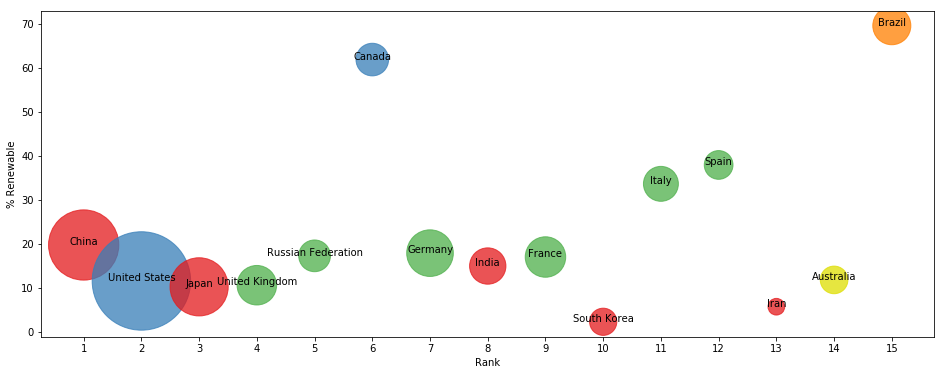

In [59]:
plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!